##  Introduction to Python MOOC Challenge 2023
#### Sales Data Analysis with Pandas and Matplotlib Modules
####                                                                                                                                                                               Author: Sumedha Tiwari

### Table of contents:
1. [Introduction](#section-1)
2. [Importing python modules, reading the csv, and preparing the data](#section-2)
3. [Clean Up Data](#section-3)
4. [Augment data with additional columns](#section-4)
5. [Analysis a Sales data by Month. What was the best month for sales? What was the highest and lowest sales amount?](#section-5)
6. [Analysis of sales data by City.](#section-6)
7. [Analysis of data by Product. What are the top 5 best selling Products?](#section-7)
8. [Writing the results of the analysis to a new csv file](#section-8)

<a id = section-1></a>
#### 1. Introduction

 To write code in Python I used Pandas to read in a csv file containing sales data, carry out basic data analysis tasks and then write the results of the analysis to a new csv file.

 In my project I have used matplotlib module to display the results of the data analysis in bar, Line and pie charts.

<a id = section-2></a>
#### 2. Importing python modules, merging the data, reading the csv file and preparing the data
In this section, firstly I imported pandas and matplotlib.pyplot modules for the data analysis and data visualization. Next, I read and merged the 12 months of sales data into a single csv file using os module. Then read the updated dataframe using the .read_csv() method and  viewed the first 5 rows of the dataframe using .head() to see what the data looks like.

#### Import Necessary Libraries


In [4]:
# Import pandas,os and matplotlib modules

import pandas as pd
import matplotlib.pyplot as plt
import os  #provides functions for creating and removing a directory (folder), fetching its contents

#### Merge the 12 months of sales data into a single csv file

In [5]:
# Use Pandas to read csv file to dataframe object

df = pd.read_csv('.\SaleData\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
files = [file for file in os.listdir('.\SaleData\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(".\SaleData\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\/" + file)
    all_months_data = pd.concat([all_months_data, df])
                     
all_months_data.to_csv("all_data.csv", index = False)                 

#### Read in updated dataframe

In [8]:
# Use pandas to read updated csv file

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<a id = section-3></a>
#### 3. Clean up Data! 
Here I dropped rows with NaN values and find rows with Or value and delete it.

#### Drop rows of NaN

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how = 'all')

#### Find rows with Or value and delete it

In [11]:
all_data = all_data[all_data['Order Date'].str[0:2]!= 'Or']

In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

<a id = section-4></a>
#### 4. Convert columns to correct datatypes and Augment data with additional columns
 I Converted Order Date column to DateTime Type and also converted the Quantity ordered and price columns to correct datatype (Numeric data type using .to_numeric() method. 
 
Added month column from Order Date column and Calculating the total sale price for each product and displaying the dataframe using .head() method.
 

#### Convert columns to correct types

In [13]:
# convert columns to numeric type and datetime type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Add a Month column
all_data['Month'] = all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add a Sales Price column

In [14]:
# Added the Sales price column by multipling Quantity Ordered and Price Each columns.

all_data.insert(4,"Sales Price", all_data['Quantity Ordered'] * all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales Price,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [15]:
# After clean up write dataframe to new csv file
all_data.to_csv("sales_data.csv", index = False)

In [16]:
# Use Pandas to read csv file to dataframe object
df = pd.read_csv("sales_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales Price,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


<a id = section-5></a>
#### 5. Analysis a Sales data by Month. What was the best month for sales? What was the highest and lowest sales amount ?

In this section, the Pandas .groupby() method is used to group the data by month. A column 'Month' is added  and then the data grouped by month is displayed in a bar chart.

The .max() and .min() methods are used to identify the month with the highest and lowest sales.

I Plot the result.Plotting is a good way to visualize these results and we can see the trends month by month.I have created a bar chart (showing sales in USD $ for each month)

The cumulative sales in USD $ for each month is calculated using the .cumsum() method and This is then used to create a line graph showing the cumulative sales by month.

In [17]:
# Use groupby to create a new dataframe object containing sales grouped by month

#sales_by_month = df.groupby('Month').sum(True,0)
sales_by_month = df.groupby('Month', as_index = False )['Sales Price'].sum()
print(sales_by_month)

# Identify the highest and lowest total sales


highest_total_sales_amount = sales_by_month['Sales Price'].max()
lowest_total_sales_amount = sales_by_month['Sales Price'].min()

    Month  Sales Price
0       1   1822256.73
1       2   2202022.42
2       3   2807100.38
3       4   3390670.24
4       5   3152606.75
5       6   2577802.26
6       7   2647775.76
7       8   2244467.88
8       9   2097560.13
9      10   3736726.88
10     11   3199603.20
11     12   4613443.34


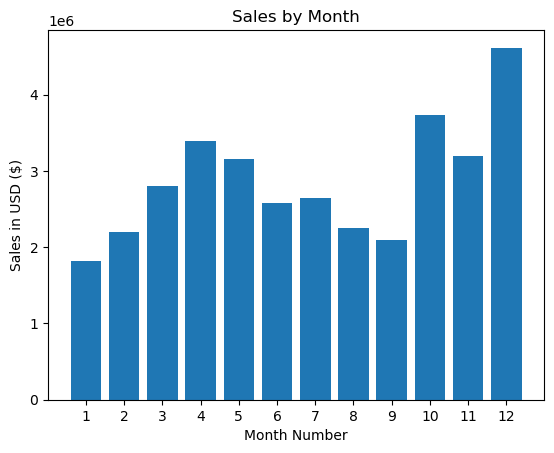

Highest Total Sales Amount: $4613443.34
Lowest Total Sales Amount: $1822256.73


In [23]:
months = range(1,13)

plt.bar(months,sales_by_month['Sales Price'])
plt.xticks(months)
plt.title('Sales by Month')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()
print(f"Highest Total Sales Amount: ${highest_total_sales_amount}")
print(f"Lowest Total Sales Amount: ${lowest_total_sales_amount}")

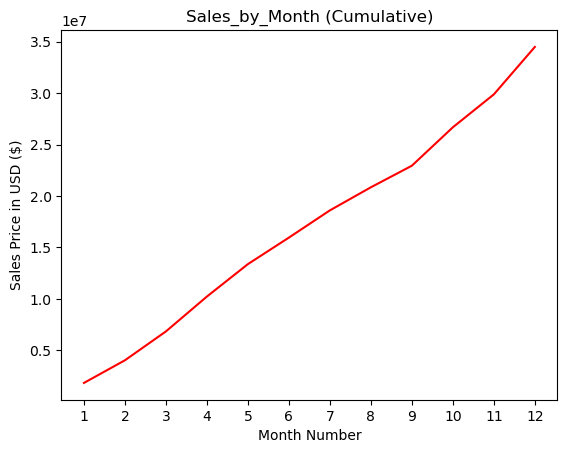

In [25]:
# Calculate cumulative monthly sales and display line chart of Cumulative Sales by Month

cumulative_sales = sales_by_month['Sales Price'].cumsum()
plt.xticks(months)
plt.title('Sales_by_Month (Cumulative)')
plt.ylabel('Sales Price in USD ($)')
plt.xlabel('Month Number')
plt.plot(months, sales_by_month['Sales Price'].cumsum(), c='red')
plt.show()

<a id = section-6></a>
#### 6. Analysis of sales data by City
In this section, I have added a City column. We do have Purchase address column so I extracted City column from Purchase address column using .apply() method.

I define a function get_city() it takes address as an argument and returns City Name. The Pandas .groupby() method is used to group the data by City and then the data grouped by city(sales by city) is displayed in a bar chart.

I have created a bar chart (showing Sales by City).

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales Price,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Add a City column

In [27]:
# We do have Purchase address column so I extracted City column from Purchase address column using .apply() method.
# For every x value(cell Content) we want it to split it by comma and then grab the first index

def get_city(address):
    return address.split(',')[1]

# Whenever we want to do something with the cell contents we can use lambda x notation

df['City'] = df['Purchase Address'].apply(lambda x : get_city(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales Price,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
2,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
3,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [28]:
# Sales by City

df.groupby('City', as_index = False)['Sales Price'].sum().sort_values(by = 'Sales Price', ascending = False).head()

,City,Sales Price
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58


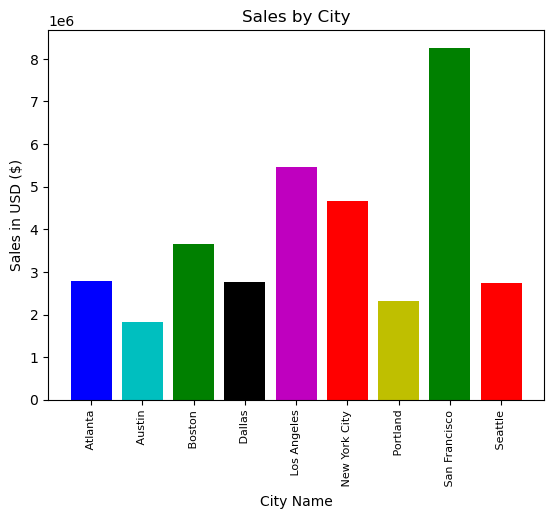

In [42]:
sales_by_city = df.groupby('City').sum(True,0)
cities = [city for city, cn in df.groupby('City')]
c = 'b','c','g','k','m','r','y','g','r'
plt.bar(cities, sales_by_city['Sales Price'],color = c)
plt.xticks(cities, rotation = 'vertical', size=8)
plt.title('Sales by City')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

<a id = section-7></a>
### 7. Analysis of data by Product
 To identify the 10 best selling products I sorted the dataframe by Quantity Ordered in descending order using the Pandas .sort_values() method. The top ten best selling products are identified and these are then displayed in the result.
 
 I then use matplotlib.pyplot to create a pie chart (showing the % of Top 10 Products by Quantity Ordered).

In [460]:
#What are the top 10 best selling products?

best_sellers = df.groupby('Product',as_index = False )['Quantity Ordered'].sum().sort_values(by = 'Quantity Ordered', ascending = False).head(10)
print(best_sellers)


                       Product  Quantity Ordered
5       AAA Batteries (4-pack)             31017
4        AA Batteries (4-pack)             27635
15        USB-C Charging Cable             23975
12    Lightning Charging Cable             23217
17            Wired Headphones             20557
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
2             27in FHD Monitor              7550
18                      iPhone              6849
1       27in 4K Gaming Monitor              6244


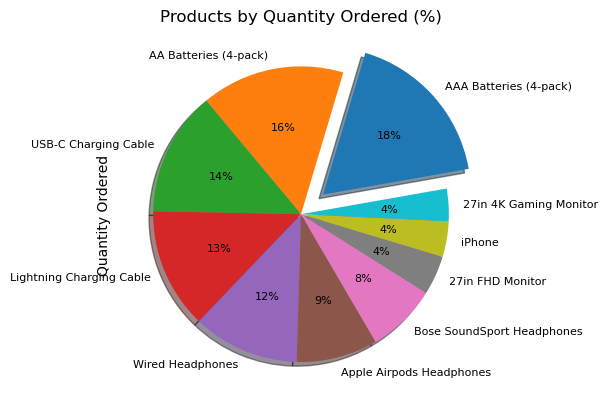

In [352]:
# Pie chart to visualize Top 10 best selling Product

myexplode = [0.2, 0, 0, 0,0,0,0,0,0,0]

df.groupby('Product').sum(True, 0).sort_values('Quantity Ordered', ascending=False).head(10).plot(
   kind='pie', y='Quantity Ordered', title="Products by Quantity Ordered (%)",legend=False, autopct='%1.0f%%',explode = myexplode,
  shadow=True, startangle = 10, fontsize = 8)


plt.show()

<a id = section-8></a>
### 8. Writing the results of the analysis to a new csv file
In this section, the results of the data analysis by Product, month and city are written to a new csv file using the .to_csv method.

In [191]:
# Write df to new csv file

df.to_csv("sales_data_new.csv", index = False)